# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
# If the package geopandas isnt installed on your python enviroment, 
# you can do it using the below code:
#conda install geopandas

# it can take a couple of minutes....

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

The geojson file is imported

In [173]:
#import json
#mun_data = json.loads("kommuner.geojson")
#mun_data['features'][0]['geometry'] #Your first point


import geopandas as gpd
mun_data = gpd.read_file('kommuner.geojson')
print(mun_data.head())


  KOMKODE     KOMNAVN  \
0    0766   Hedensted   
1    0766   Hedensted   
2    0561     Esbjerg   
3    0849  Jammerbugt   
4    0849  Jammerbugt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

DST data

In [174]:
import pydst
dst = pydst.Dst(lang='en')

# GALDER
galder = dst.get_data(table_id = 'GALDER', variables={'KOMK':['*'], 'KØN':['*'], 'TID':['*']})
#galder.head()


# FLY66 flytninger mellem kommuner
fly = dst.get_data(table_id = 'FLY66', variables={'TILKOMMUNE':['*'], 'FRAKOMMUNE':['*'], 'ALDER':['*'], 'KØN':['*'], 'TID':['*']})
#fly.head(5)

In [175]:
# renameing the municipality variables
fly['TILKOMMUNE'] = fly['TILKOMMUNE'].str.replace(r'To ', '')
fly['FRAKOMMUNE'] = fly['FRAKOMMUNE'].str.replace(r'From ', '')

# I find the sum of people moving for every municipality pair and year.
fly_sum = fly.groupby(['TILKOMMUNE','FRAKOMMUNE'], as_index=False)['INDHOLD'].sum()

# the capital name is wrong, has to be changed
fly_sum['TILKOMMUNE'] = fly_sum['TILKOMMUNE'].replace(['Copenhagen'], 'København')
fly_sum['FRAKOMMUNE'] = fly_sum['FRAKOMMUNE'].replace(['Copenhagen'], 'København')

# the name of høje taastrup is wrong
fly_sum['TILKOMMUNE'] = fly_sum['TILKOMMUNE'].replace(['Høje-Taastrup'], 'Høje Taastrup')
fly_sum['FRAKOMMUNE'] = fly_sum['FRAKOMMUNE'].replace(['Høje-Taastrup'], 'Høje Taastrup')

# med tid
# fly_sum = fly.groupby(['TILKOMMUNE','FRAKOMMUNE','TID'], as_index=False)['INDHOLD'].sum()

fly_sum.head(5)


,TILKOMMUNE,FRAKOMMUNE,INDHOLD
0,Aabenraa,Aalborg,549
1,Aabenraa,Aarhus,2327
2,Aabenraa,Albertslund,55
3,Aabenraa,Allerød,24
4,Aabenraa,Assens,243


In [176]:
# Excluding non municipality observations
I  = galder.KOMK.str.contains('Region')
I |= galder.KOMK.str.contains('All')
galder.loc[I, :]
galder = galder.loc[I == False] # keep everything else

# excluding the seperat rows for men and women, only keeping the total.
J = galder.KØN.str.contains('Total')
galder.loc[J, :]
galder = galder.loc[J == True] # keep everything else

# wont need the KØN column once ive restricted the data set to only contain the total.
galder.drop(columns=['KØN'], inplace=True)

galder.head(5)

,KOMK,TID,INDHOLD
20,Copenhagen,2019,36.0
23,Frederiksberg,2019,39.8
26,Ballerup,2019,42.2
29,Brøndby,2019,41.5
32,Dragør,2019,44.4


In [177]:
# saves copys of the data as excel files to the folder.
fly_sum.to_excel("fly_summeret.xlsx")
mun_data.to_excel('geopandas_mun_names.xlsx')
galder.to_excel('galder.xlsx')

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

# Merge data sets

In [179]:



# forbereder mun_data til merge
#mun_data_u = mun_data.drop_duplicates('KOMNAVN')
#mun_data_u.head(5)

# merger one to many.       //, validate="one_to_many"
fly_geo = pd.merge(mun_data, fly_sum, 
                   left_on=['KOMNAVN'], right_on=['FRAKOMMUNE'],
                   how='inner')


#fly_geo.head(1)

# Analysis

In [192]:
from ipywidgets import interact, interactive, fixed, interact_manual

def f(x):
    return x

#interact(f, x=widgets.Dropdown(['Aarhus', 'Odense', 'København']));
interact(f, x=(1,2));


def f(x):
    fig, ax = plt.subplots(1, figsize=(10,6))
    fly_geo[fly_geo['TILKOMMUNE']==by].plot(column='INDHOLD', 
                                            missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values",}, 
                                            cmap='spring', linewidth=1, ax=ax, edgecolor='0.1', 
                                            legend = True)
    ax.axis('off')
    return 

def f(x):
    return x

interact(f, x=widgets.Dropdown(['Aarhus', 'Odense', 'København']));



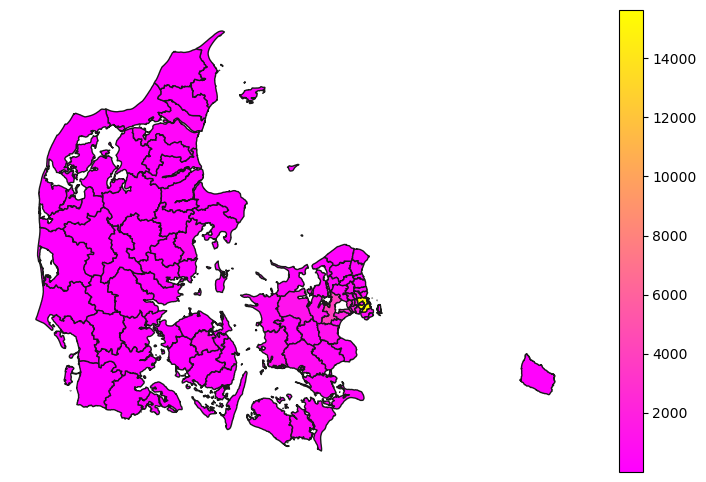

In [187]:


fig, ax = plt.subplots(1, figsize=(10,6))
fly_geo[fly_geo['TILKOMMUNE']=="Høje Taastrup"].plot(column='INDHOLD', 
                                                     missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values",}, 
                                                     cmap='spring', linewidth=1, ax=ax, edgecolor='0.1', 
                                                     legend = True)
ax.axis('off')
fig.savefig('map.pdf')

# Conclusion

ADD CONCISE CONLUSION.